### Gabriel Augusto Maciel Toledo, RM551654  
### Gabriel Freitas Maradei, RM550187  
### Guilherme Gonçalves Calil Daher, RM98611



  ##                       Análise da emissão de Co2 no Brasil e no mundo e suas causas



  Este estudo explora a relação entre as emissões de CO₂ e as taxas de desmatamento em um contexto global, com foco no Brasil, Estados Unidos e outros países chave, abrangendo o período de 2000 a 2020. Utilizando dados provenientes da plataforma **Kaggle**, o projeto visa entender as interações entre esses dois fatores, particularmente o impacto do desmatamento nas emissões de gases de efeito estufa. O projeto analisa tendências globais e regionais, considerando as principais economias como Brasil e EUA, para avaliar o papel desses países nas mudanças climáticas. Através de gráficos interativos e análises de dados, o estudo destaca as relações complexas entre desmatamento, emissões de CO₂ e políticas ambientais, sublinhando a importância de políticas de mitigação e o papel das florestas no controle das emissões.

 #### Primeiramente importamos todas as bibliotecas a serem usadas no projeto




In [132]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


#### Após isso, vamos importar o dataset que encontramos no Kaggle

In [133]:
# Carregar o dataset
df = pd.read_csv('datasetCO2.csv')


#### Aqui fazemos uma limpeza nos dados do dataset, elininando todas as informações que existiam anterior ao ano de 1950

In [134]:


df = df[df['Year'] >= 1950]





 ### Importando o segundo dataset

In [122]:
# Carregar os datasets
df_co2 = pd.read_csv('datasetCO2.csv')
df_deforestation = pd.read_csv('dataset2.csv')

print(df_deforestation)

    iso3c  forests_2000  forests_2020  trend
0     AFG           1.9           1.9    0.0
1     ALB          28.1          28.8    2.5
2     DZA           0.7           0.8   14.3
3     ASM          88.7          85.7   -3.4
4     AND          34.0          34.0    0.0
5     AGO          62.3          53.4  -14.3
6     AIA          61.1          61.1    0.0
7     ATG          21.5          18.5  -14.0
8     ARG          12.2          10.4  -14.8
9     ARM          11.7          11.5   -1.7
10    ABW           2.3           2.3    0.0
11    AUS          17.2          17.4    1.2
12    AUT          46.5          47.3    1.7
13    AZE          12.0          13.7   14.2
14    BHS          50.9          50.9    0.0
15    BHR           0.5           0.9   80.0
16    BGD          14.8          14.5   -2.0
17    BRB          14.7          14.7    0.0
18    BLR          40.8          43.2    5.9
19    BEL          22.0          22.8    3.6
20    BLZ          64.0          56.0  -12.5
21    BEN 

### Abaixo vamos juntar os dois datasets, o segundo fornece dados desses países sobre o desmatamento, para ver e comparar o impacto direto disso no aumento da emissões de Co2, além disso foi preciso associar os nomes dos países de um dataset, com a sigla do outro, para que houvesse essa associação e conseguir juntar os dois datasets

In [111]:
# Validar quais países estão mapeados
unmapped_countries = set(df_deforestation['iso3c']) - set(country_mapping.keys())
if unmapped_countries:
    print(f"Países não mapeados encontrados: {unmapped_countries}")
   


df_deforestation['Entity'] = df_deforestation['iso3c'].map(country_mapping)

# Verificar se houve perdas no mapeamento
missing_entities = df_deforestation[df_deforestation['Entity'].isna()]
if not missing_entities.empty:
    print("Linhas com países não mapeados:")
    print(missing_entities)

# Realizar o merge entre os datasets baseado na coluna 'Entity'
# Mantendo as colunas específicas do dataset de desmatamento separadas
df_deforestation = df_deforestation.rename(columns={
    'forests_2000': 'Deforestation_forests_2000',
    'forests_2020': 'Deforestation_forests_2020',
    'trend': 'Deforestation_trend'
})

df_combined = pd.merge(
    df_co2,
    df_deforestation[['Entity', 'iso3c', 'Deforestation_forests_2000', 'Deforestation_forests_2020', 'Deforestation_trend']],
    on='Entity',
    how='left'
)

# Filtrar os dados para remover anos anteriores a 1950
df_combined = df_combined[df_combined['Year'] >= 1950]

# Verificar valores ausentes pós-merge
missing_data = df_combined[df_combined.isna().any(axis=1)]
if not missing_data.empty:
    print("Linhas com valores ausentes após o merge:")
    print(missing_data)

# Verificar o dataframe combinado
print(df_combined.head())



Linhas com valores ausentes após o merge:
                                Entity      Code  Year  Annual CO₂ emissions  \
272                             Africa       NaN  1950          9.345217e+07   
273                             Africa       NaN  1951          9.986208e+07   
274                             Africa       NaN  1952          1.088824e+08   
275                             Africa       NaN  1953          1.107961e+08   
276                             Africa       NaN  1954          1.161569e+08   
277                             Africa       NaN  1955          1.280583e+08   
278                             Africa       NaN  1956          1.335094e+08   
279                             Africa       NaN  1957          1.399531e+08   
280                             Africa       NaN  1958          1.483045e+08   
281                             Africa       NaN  1959          1.479108e+08   
282                             Africa       NaN  1960          1.566404e+08  

### O gráfico abaixo apresenta a comparação das emissões anuais de CO₂ entre o Brasil, o mundo, os Estados Unidos, o continente americano e a OCDE 

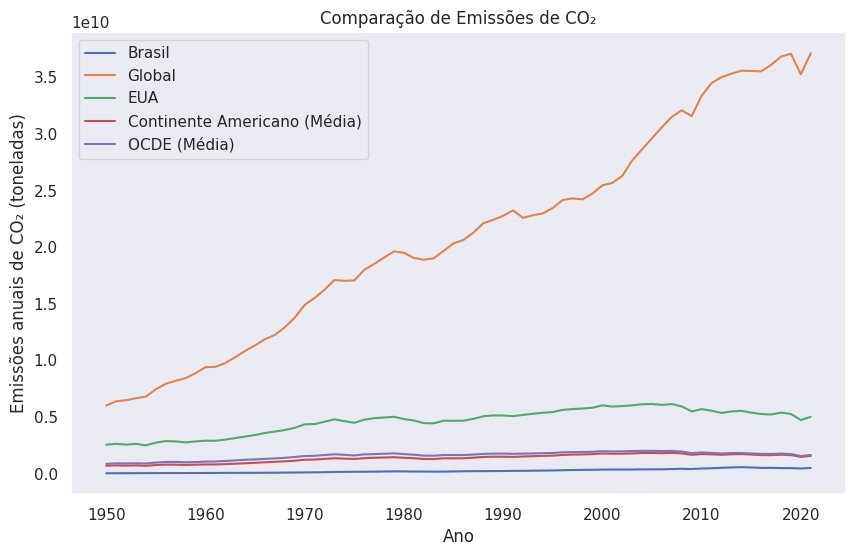

In [112]:


# 1. Filtrar dados relevantes
brasil = df[df['Entity'] == 'Brazil']
global_data = df[df['Entity'] == 'World']
eua = df[df['Entity'] == 'United States']
americas = df[df['Entity'].isin(['Brazil', 'United States', 'Argentina', 'Canada', ...])]  # Adicionar países
ocde_countries = ['United States', 'Canada', 'Germany', 'France', ...]  # Lista completa da OCDE
ocde = df[df['Entity'].isin(ocde_countries)]

# 2. Agrupar e calcular médias ou totais
americas_avg = americas.groupby('Year')['Annual CO₂ emissions'].mean()
ocde_avg = ocde.groupby('Year')['Annual CO₂ emissions'].mean()

# 3. Visualizar tendências
plt.figure(figsize=(10, 6))
plt.plot(brasil['Year'], brasil['Annual CO₂ emissions'], label='Brasil')
plt.plot(global_data['Year'], global_data['Annual CO₂ emissions'], label='Global')
plt.plot(eua['Year'], eua['Annual CO₂ emissions'], label='EUA')
plt.plot(americas_avg.index, americas_avg, label='Continente Americano (Média)')
plt.plot(ocde_avg.index, ocde_avg, label='OCDE (Média)')

plt.title('Comparação de Emissões de CO₂')
plt.xlabel('Ano')
plt.ylabel('Emissões anuais de CO₂ (toneladas)')
plt.legend()
plt.grid()
plt.show()


#### O gráfico revela um aumento alarmante nas emissões globais de CO₂, com destaque para os Estados Unidos, que se mantém como o maior poluidor mundial, ultrapassando amplamente as médias global e de outras regiões. Na comparação das emissões anuais, a ordem de maior para menor emissões foi: Estados Unidos, Brasil, Continente Americano, e OCDE. A posição do Brasil, com emissões elevadas, pode ser explicada em parte pela vasta área florestal e características tropicais do país, que influenciam diretamente nas emissões de CO₂. Esse cenário evidencia a urgência de estratégias globais mais eficazes para reduzir a pegada de carbono, principalmente nos maiores emissores.

In [92]:
# Filtrar as linhas com colunas de desmatamento preenchidas
df_filled_deforestation = df_combined.dropna(subset=['Deforestation_forests_2000', 'Deforestation_forests_2020', 'Deforestation_trend'])

# Filtrar apenas para os países Brasil, Estados Unidos e China
df_filtered_countries = df_filled_deforestation[df_filled_deforestation['Entity'].isin(['Brazil', 'United States', 'China'])]

# Exibir o resultado
print(df_filtered_countries)


              Entity Code  Year  Annual CO₂ emissions  \
5793          Brazil  BRA  1950          1.965907e+07   
5794          Brazil  BRA  1951          2.165935e+07   
5795          Brazil  BRA  1952          2.493431e+07   
5796          Brazil  BRA  1953          2.521844e+07   
5797          Brazil  BRA  1954          2.967563e+07   
5798          Brazil  BRA  1955          3.402369e+07   
5799          Brazil  BRA  1956          3.660846e+07   
5800          Brazil  BRA  1957          3.597408e+07   
5801          Brazil  BRA  1958          3.905393e+07   
5802          Brazil  BRA  1959          3.901708e+07   
5803          Brazil  BRA  1960          4.685182e+07   
5804          Brazil  BRA  1961          4.912343e+07   
5805          Brazil  BRA  1962          5.358608e+07   
5806          Brazil  BRA  1963          5.548140e+07   
5807          Brazil  BRA  1964          5.656608e+07   
5808          Brazil  BRA  1965          5.620402e+07   
5809          Brazil  BRA  1966

 ### Gráfico: Top 10 Países com Maiores Emissões Acumuladas de CO₂ 

Este gráfico mostra os 10 países com as maiores emissões acumuladas de CO₂, com os Estados Unidos sendo o primeiro da lista. Excluindo continentes e outras entidades. O gráfico de barras utiliza a paleta de cores "coolwarm" para facilitar a visualização dos dados.

/tmp/ipykernel_5514/1045966130.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Annual CO₂ emissions', y='Entity', data=top_emitters, palette='coolwarm')


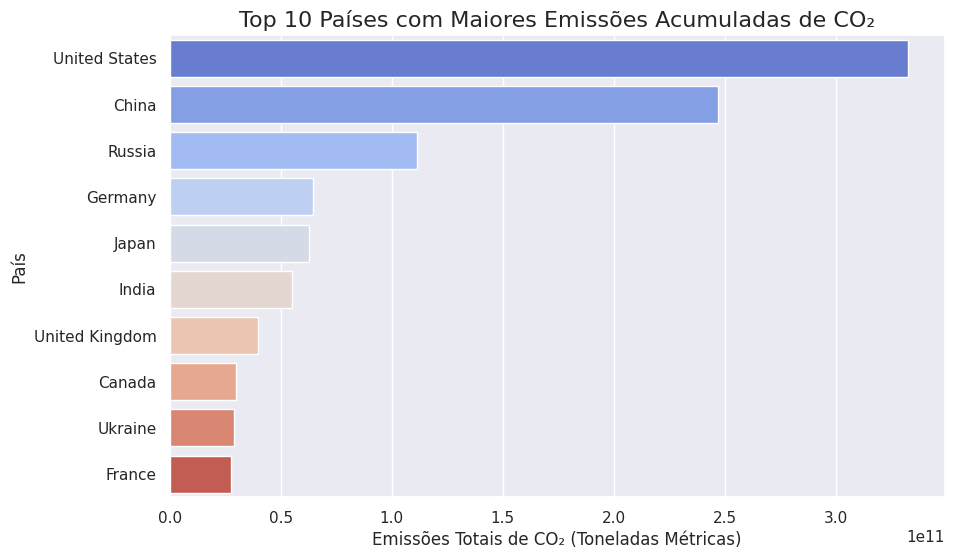

In [118]:


# Lista de países válidos (exemplo, você pode ampliar essa lista conforme necessário)
valid_countries = [
    'Brazil', 'Argentina', 'United States', 'China', 'India', 'Russia', 'Germany', 
    'France', 'United Kingdom', 'Japan', 'Canada', 'Australia', 'South Korea', 
    'Mexico', 'Italy', 'Saudi Arabia', 'Spain', 'Indonesia', 'Turkey', 'South Africa',
    'Pakistan', 'Vietnam', 'Egypt', 'Malaysia', 'Thailand', 'United Arab Emirates', 
    'Nigeria', 'Colombia', 'Poland', 'Iraq', 'Algeria', 'Kazakhstan', 'Chile', 'Angola', 
    'Peru', 'Sudan', 'Ukraine', 'Morocco', 'Singapore', 'Romania', 'Uzbekistan', 'Bangladesh'
]


# Filtrando o dataframe para incluir apenas países válidos
top_emitters = df_combined[df_combined['Entity'].isin(valid_countries)].groupby('Entity')['Annual CO₂ emissions'].sum().nlargest(10).reset_index()

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Annual CO₂ emissions', y='Entity', data=top_emitters, palette='coolwarm')

# Configurações do gráfico
plt.title('Top 10 Países com Maiores Emissões Acumuladas de CO₂', fontsize=16)
plt.xlabel('Emissões Totais de CO₂ (Toneladas Métricas)', fontsize=12)
plt.ylabel('País', fontsize=12)

plt.show()


#### Conclusão:
O gráfico revela claramente a posição dos Estados Unidos como o maior emissor de CO₂, seguido por outros países com grandes impactos ambientais. A exibição das emissões acumuladas por país proporciona uma análise mais focada e revela a importância de políticas públicas específicas para reduzir as emissões nos países com maiores responsabilidades globais.

### Gráfico de barras 

Será gerado um gráfico de barras empilhadas comparando o desmatamento nos anos de 2000 e 2020 em diferentes países, permitindo observar as variações ao longo do tempo para cada país.

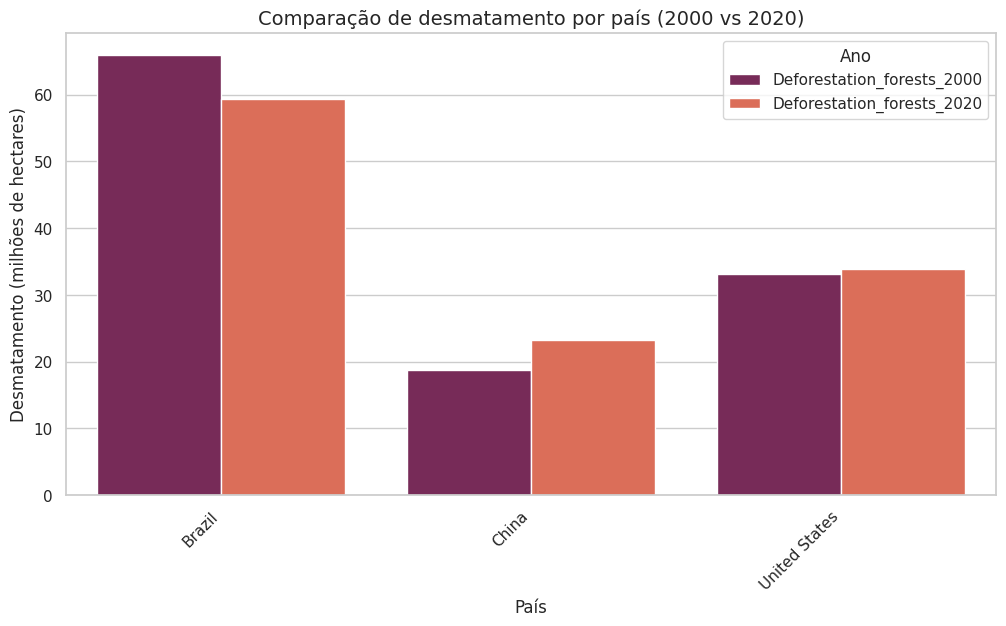

In [98]:
# Barras empilhadas de desmatamento por país
try:
    # Preparação dos dados
    df_barras = df_filtered_countries.melt(
        id_vars=['Entity'],  # 'Entity' representa os países
        value_vars=['Deforestation_forests_2000', 'Deforestation_forests_2020'],
        var_name='Ano',
        value_name='Desmatamento'
    )
    
    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=df_barras,
        x='Entity',
        y='Desmatamento',
        hue='Ano',
        palette='rocket'
    )
    plt.title('Comparação de desmatamento por país (2000 vs 2020)', fontsize=14)
    plt.xlabel('País', fontsize=12)
    plt.ylabel('Desmatamento (milhões de hectares)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Ano', loc='upper right')
    plt.show()
except Exception as e:
    print("Erro ao criar o gráfico de barras:", e)

### Conclusão

 O gráfico mostra como os índices de desmatamento mudaram de 2000 a 2020. Países como o Brasil podem ter reduzido o desmatamento, enquanto outros podem ter aumentado. A comparação ajuda a entender as mudanças nas políticas e o impacto ambiental ao longo do tempo. È importante ressaltar que mesmo havendo uma diminuição os números ainda seguem sendo absutrdamente altos

#### Ese gráfico irá mostrar a quantidade exata de desmatamento, e comparando com o gráfico anterior, ele é importante intuitivamente para mostrar que apesar do Brasil diminuir esse número, ainda são quase maiores que da China e os EUA juntos.

 ### Este gráfico de linha apresenta a tendência de desmatamento de florestas entre 2000 e 2020 e para os próximos anos para diferentes países. 

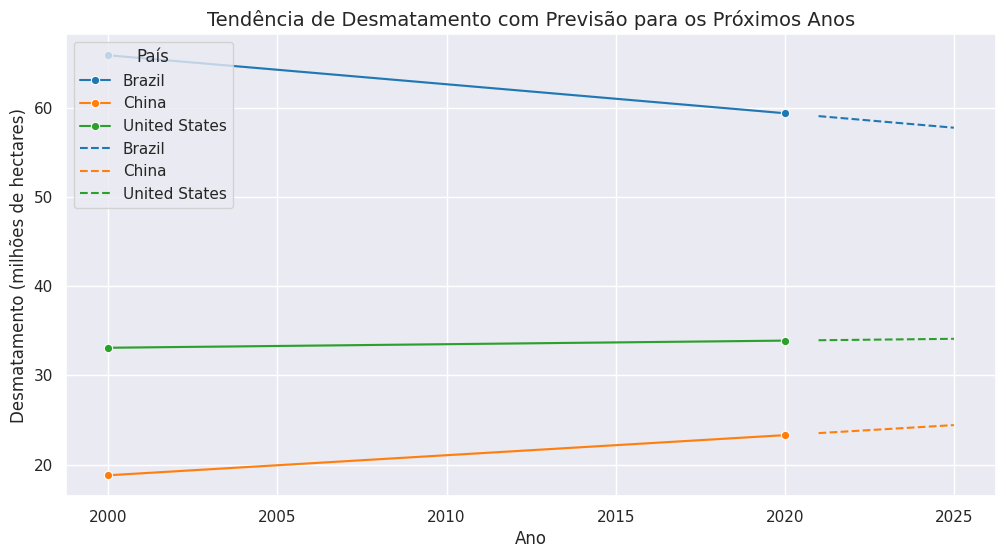

In [130]:

# 1. Preparando os dados para análise de tendência
df_line = df_filtered_countries[['Entity', 'Deforestation_forests_2000', 'Deforestation_forests_2020']].copy()
df_line = df_line.melt(
    id_vars=['Entity'],
    value_vars=['Deforestation_forests_2000', 'Deforestation_forests_2020'],
    var_name='Ano',
    value_name='Desmatamento'
)
df_line['Ano'] = df_line['Ano'].str.extract(r'(\d{4})')  # Extrair o ano da coluna
df_line['Ano'] = df_line['Ano'].astype(int)  # Converter para inteiro

# 2. Modelo de regressão linear para previsão de tendência futura
def predict_trend(df_line, years_ahead=5):
    # Inicializando o modelo de regressão linear
    model = LinearRegression()

    # Calculando a tendência para cada país
    predictions = []
    for country in df_line['Entity'].unique():
        country_data = df_line[df_line['Entity'] == country]
        
        # Usando os dados de desmatamento de 2000 e 2020 para criar uma tendência
        X = country_data['Ano'].values.reshape(-1, 1)  # Ano como variável independente
        y = country_data['Desmatamento'].values  # Desmatamento como variável dependente
        
        model.fit(X, y)  # Treinando o modelo
        
        # Fazendo previsões para os próximos anos
        future_years = np.array([2021 + i for i in range(years_ahead)]).reshape(-1, 1)
        future_predictions = model.predict(future_years)
        
        # Salvando as previsões
        for i, year in enumerate(future_years.flatten()):
            predictions.append([country, year, future_predictions[i]])

    return pd.DataFrame(predictions, columns=['Entity', 'Ano', 'Predicted_Desmatamento'])

# Prevendo para os próximos 5 anos
predicted_data = predict_trend(df_line, years_ahead=5)

# 3. Criando o gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_line, x='Ano', y='Desmatamento', hue='Entity', marker='o', palette='tab10')
sns.lineplot(data=predicted_data, x='Ano', y='Predicted_Desmatamento', hue='Entity', linestyle='--', palette='tab10', dashes=[2, 2])

# Adicionando título e labels
plt.title('Tendência de Desmatamento com Previsão para os Próximos Anos', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Desmatamento (milhões de hectares)', fontsize=12)
plt.legend(title='País', loc='upper left')
plt.grid(visible=True)
plt.show()


#### É possivel perceber que a tendência desses numeros são praticamente constantes, Brasil uma diminuição muito leve e China e EUA aumentos contínuos e consideraveis


## O gráfico a seguir tem como objetivo, analisar a diferença presente nos focos que esses países devem ter em suas preocupações 

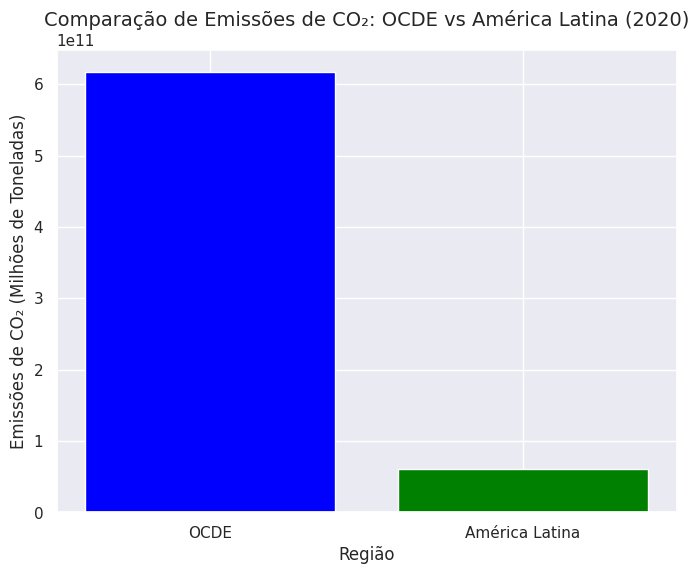

In [131]:



# Filtrando os dados para a OCDE e América Latina
paises_oecd = ['United States', 'Canada', 'Germany', 'United Kingdom', 'France', 'Italy', 'Japan', 'South Korea', 'Australia']
paises_america_latina = ['Brazil', 'Argentina', 'Chile', 'Mexico', 'Colombia', 'Peru', 'Venezuela', 'Ecuador', 'Bolivia']

# Somando as emissões de CO2 para a OCDE
emissoes_oecd = df[df['Entity'].isin(paises_oecd)]['Annual CO₂ emissions'].sum()

# Somando as emissões de CO2 para a América Latina
emissoes_america_latina = df[df['Entity'].isin(paises_america_latina)]['Annual CO₂ emissions'].sum()

# Criando o gráfico de comparação
regioes = ['OCDE', 'América Latina']
emissoes = [emissoes_oecd, emissoes_america_latina]

plt.figure(figsize=(8, 6))
plt.bar(regioes, emissoes, color=['blue', 'green'])
plt.title('Comparação de Emissões de CO₂: OCDE vs América Latina (2020)', fontsize=14)
plt.xlabel('Região', fontsize=12)
plt.ylabel('Emissões de CO₂ (Milhões de Toneladas)', fontsize=12)
plt.show()


Este gráfico compara as emissões de CO₂ entre a OCDE e a América Latina em 2020, destacando a enorme disparidade entre as duas regiões. A OCDE, composta por países altamente industrializados, apresenta emissões elevadas devido ao uso intensivo de energia, veículos e processos industriais, refletindo a dificuldade de transição para economias de baixo carbono, apesar de avanços tecnológicos. Já a América Latina, com economias em desenvolvimento, apresenta emissões consideravelmente mais baixas, em parte devido à menor industrialização e à presença de vastas áreas florestais que ajudam na absorção de CO₂. No entanto, o desmatamento e a expansão agrícola na região representam desafios. A comparação evidencia a responsabilidade histórica da OCDE nas emissões e a importância de políticas ambientais diferenciadas: enquanto a OCDE deve investir em tecnologias de baixo carbono, a América Latina pode focar na preservação ambiental e no uso de energias renováveis, contribuindo para a mitigação das mudanças climáticas de forma sustentável.